   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

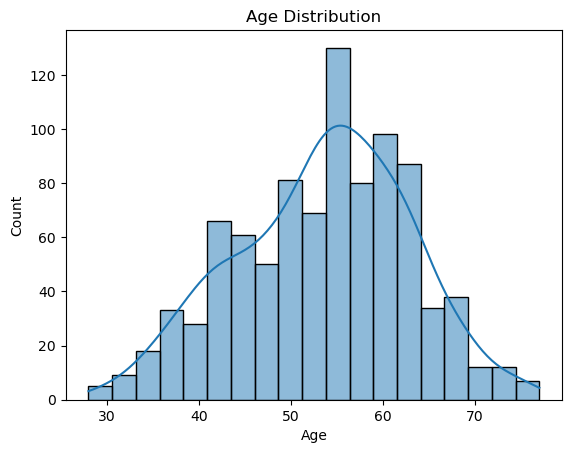

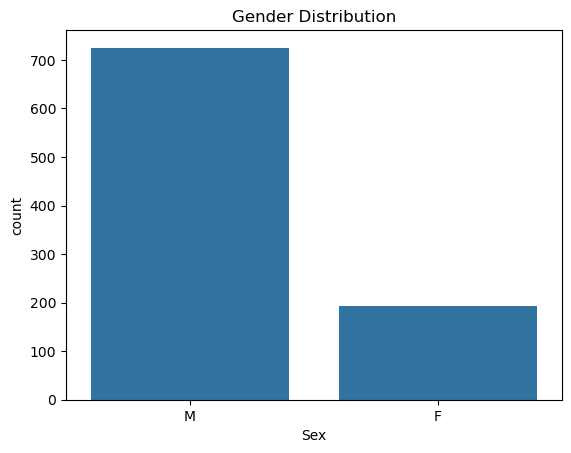

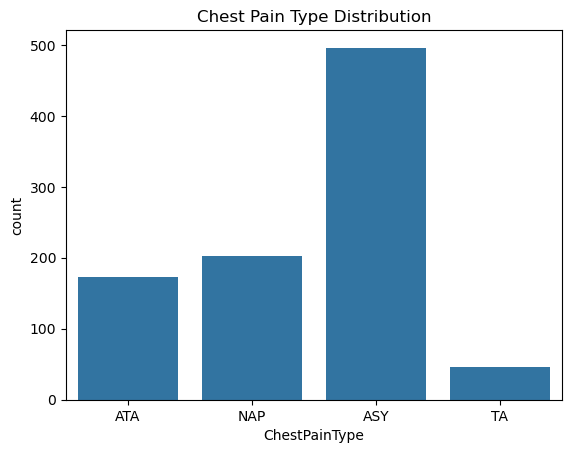

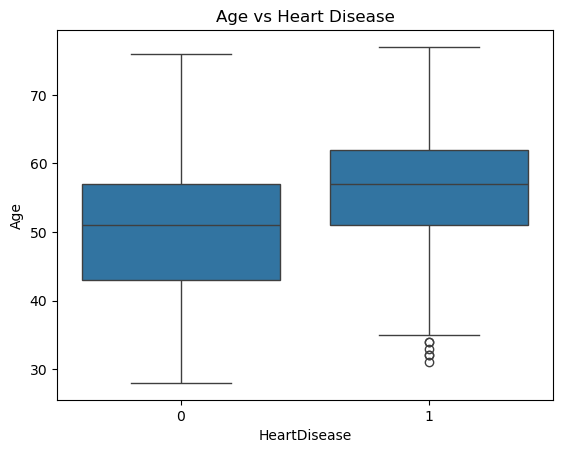

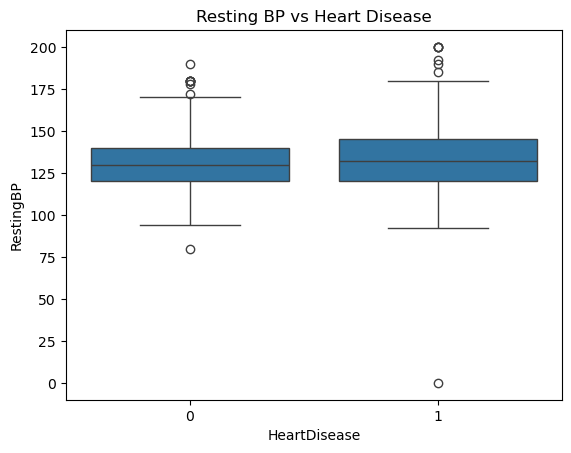

Accuracy: 0.8478260869565217
Confusion Matrix:
 [[66 11]
 [17 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to CSV file
file_path = r"/Users/khrystynaplatko/Desktop/heart.csv"

# Read CSV file into Pandas DF 
df = pd.read_csv(file_path)

# Basic info and overview (first 5 rows, summary, descriptive stats, missing values check)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# plot features to see distribition 
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='ChestPainType', data=df)
plt.title('Chest Pain Type Distribution')
plt.show()

sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Resting BP vs Heart Disease')
plt.show()

# Data preprocessing
# Encode 'Sex' ('M'->1, 'F'->0)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

# Encode 'ExerciseAngina' ('Y'->1, 'N'->0)
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Encode 'ChestPainType' into multiple columns
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)

# Encode 'RestingECG' ('Normal'->0, 'ST'->1, 'LVH'->2)
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})

# Encode 'ST_Slope' ('Up'->0, 'Flat'->1, 'Down'->2)
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# All columns are considered features. Every predictor in dataset is used. 
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Feature Coefficients and Their Contribution to the Model:

              Feature  Coefficient
9            ST_Slope     1.543806
10  ChestPainType_ATA    -1.399332
11  ChestPainType_NAP    -1.245506
7      ExerciseAngina     1.148843
1                 Sex     1.045751
4           FastingBS     0.834791
12   ChestPainType_TA    -0.811698
8             Oldpeak     0.417832
5          RestingECG     0.053170
0                 Age     0.012248
6               MaxHR    -0.008139
3         Cholesterol    -0.004029
2           RestingBP     0.001733


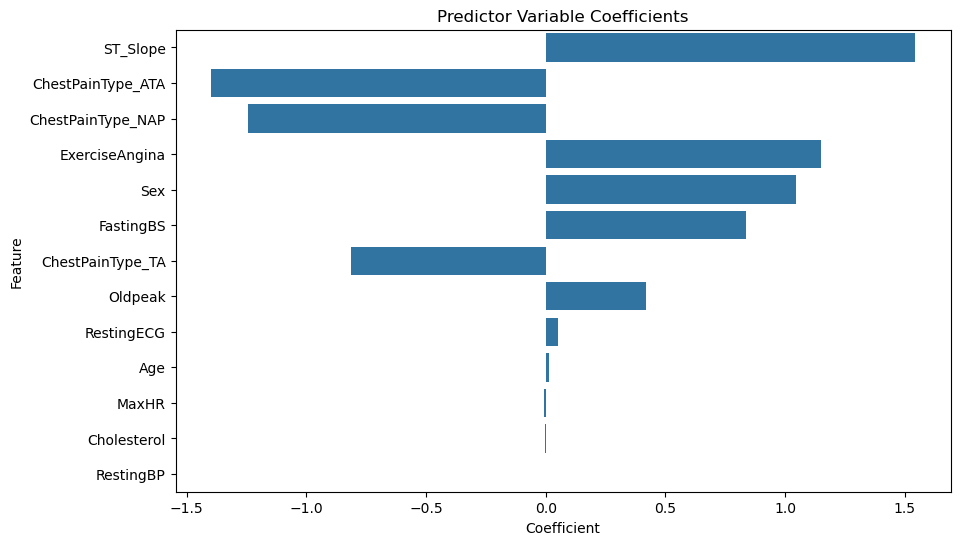

In [ ]:
import numpy as np

# Get feature names
feature_names = X.columns

# Get the coefficients (for the logistic regression model)
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by coefficient value 
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print("Feature Coefficients and Their Contribution to the Model:\n")
print(coef_df[['Feature', 'Coefficient']])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Predictor Variable Coefficients')
plt.show()